In [0]:
#DIGIT REC KAGGLE


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"justluvx","key":"3c8b271d30448a0216a0ddbd7457f992"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 64 Apr  2 14:41 kaggle.json
{"username":"justluvx","key":"3c8b271d30448a0216a0ddbd7457f992"}

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

    100% |████████████████████████████████| 81kB 3.0MB/s 
    100% |████████████████████████████████| 5.3MB 6.5MB/s 
    100% |████████████████████████████████| 92kB 25.5MB/s 
    100% |████████████████████████████████| 51kB 18.4MB/s 


In [0]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       2613            True  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      10621            True  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4419           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         36           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       2645           False  
two-sigma-financial-news                           2019-07-15 23:59:00  Featured          $100,000      

In [0]:
!kaggle competitions download -c 'digit-recognizer'


 94% 69.0M/73.2M [00:00<00:00, 81.3MB/s]
100% 73.2M/73.2M [00:00<00:00, 107MB/s] 
 94% 46.0M/48.8M [00:00<00:00, 33.2MB/s]
100% 48.8M/48.8M [00:00<00:00, 58.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 76.0MB/s]


In [0]:
!ls


kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv


In [0]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout,Lambda, Activation,Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import os

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

Using TensorFlow backend.


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Splite data the X - Our data , and y - the prdict label
X = train.drop('label',axis = 1)
y = train['label'].astype('category')


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)


print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Data after scaler


array([ 0.        ,  0.        ,  0.        , -0.00563445, -0.00934786,
       -0.01146929, -0.01602454, -0.01900911, -0.02430429, -0.02820295,
       -0.03002255, -0.0314335 , -0.03207189, -0.03131955, -0.02973715,
       -0.0275915 , -0.02309173, -0.0179879 , -0.01611954, -0.01099501])

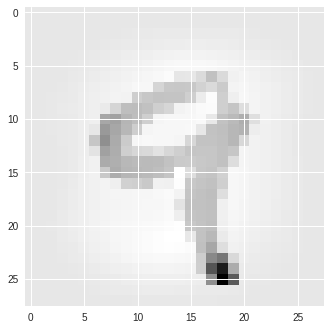

In [0]:
print("Data after scaler")
plt.imshow(X_train[0].reshape(28,28),interpolation='nearest', cmap='Greys')
X_train[0][30:50]

In [0]:
X_train = tf.reshape(X_train, [-1, 28, 28,1])
X_test = tf.reshape(X_test, [-1, 28, 28,1])

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, steps_per_epoch = 32,epochs=15, validation_data = (X_test, y_test), validation_steps = 10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 31500 samples, validate on 10500 samples
Epoch 1/15
32/32 [==============================] - 6s 202ms/step - loss: 0.7954 - acc: 0.7587 - val_loss: 0.3489 - val_acc: 0.9024
Epoch 2/15
32/32 [==============================] - 1s 16ms/step - loss: 0.2393 - acc: 0.9321 - val_loss: 0.2531 - val_acc: 0.9304
Epoch 3/15
32/32 [==============================] - 1s 16ms/step - loss: 0.1675 - acc: 0.9544 - val_loss: 0.2176 - val_acc: 0.9401
Epoch 4/15
32/32 [==============================] - 0s 16ms/step - loss: 0.1299 - acc: 0.9654 - val_loss: 0.1970 - val_acc: 0.9453
Epoch 5/15
32/32 [==============================] - 1s 16ms/step - loss: 0.1047 - acc: 0.9729 - val_loss: 0.1832 - val_acc: 0.9489
Epoch 6/15
32/32 [==============================] - 1s 16ms/step - loss: 0.0858 - acc: 0.9789 - val_loss: 0.1734 - val_acc: 0.9528
Epoch 7/15
32/32 [=========================

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test, steps = 10)
print("loss",test_loss)
print("acc",test_acc)

10/10 [==============================] - 0s 4ms/step
loss 0.15367300808429718
acc 0.9614285826683044


In [0]:
fn =  "mymodel.h5"
model.save_weights(fn)

In [0]:
import cv2
gray = cv2.imread(".png", cv2.IMREAD_GRAYSCALE)
gray = cv2.resize(255-gray, (28, 28))
# gray = gray/255
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()
pr = model.predict_classes(gray.reshape(1, 28, 28))
print(pr)


TypeError: ignored

In [0]:
!pip install pip
